# UBER SUPPLY DEMAND GAP
PROJECT TYPE: Exploratory Data Analysis(EDA)

CONTRIBUTION: Individual Project

NAME: Harshita Pandey

# Project Summary

This project aims to analyze and visualize the gap between supply and demand in Uber ride requests by exploring a real-world dataset of ride requests. The primary goal is to identify when and where the most significant demand-supply gaps occur, especially focusing on key time slots and locations, using Excel for data cleaning and dashboards, MySQL for insights, and Python (Pandas, Numpy, Matplotlib) for exploratory data analysis (EDA).

Tech Stack Used: Python (Pandas, Matplotlib, Seaborn) – for EDA and visualizations SQL – for querying and insights MS Excel – for data cleaning and dashboard creation

Key Steps Performed:

Data Cleaning (Excel):

Removed null/missing values

Standardized date-time formats for Request timestamp and Drop timestamp

Split timestamps into separate date and hour columns

Removed duplicates and corrected inconsistencies

Exploratory Data Analysis (Python – Pandas):

Converted string timestamps to datetime objects

Extracted features: day, hour, and AM/PM

Grouped data by pickup point and time to study demand trends

Identified peak hours of demand and shortage of drivers

Visualizations (Python):

Number of ride requests per hour

Supply vs. demand comparison at Airport and City

Frequency of different ride statuses (Trip Completed, Cancelled, No Cars Available)

Heatmap of request status by hour and location

Pie chart of percentage of issues (cancellations, no cars)

SQL Insights:

Count of completed vs. unfulfilled requests

Average trip time

Peak hours for ride requests by pickup location

Top 5 busiest hours for Uber

Percentage of requests without car availability

Excel Dashboard:

Interactive charts showing supply-demand trends

Filters for pickup point and time slots

# GITHUB LINK

# Problem Statement

Objective of the Project:

The objective of this project is to analyze the supply-demand dynamics of Uber ride requests using historical data, with a focus on identifying the mismatch between customer demand and driver availability across different times of the day and pickup locations.

The key goal is to: Understand when and where the demand exceeds supply (i.e., when rides are either cancelled or cars are not available), provide actionable insights to minimize ride cancellations and improve resource allocation by Uber, and enable data-driven decision-making through the use of EDA, SQL queries, and Excel dashboards.

import pandas as pd

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset from csv to pandas dataframe

uberdata = pd.read_csv("Uber Request Data.csv")

In [3]:
#Analyzing differnt colums in the dataset

uberdata.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
uberdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [5]:
#check for duplicate rows

sum(uberdata.duplicated(subset = "Request id")) == 0

True

In [6]:
# check dimentions for dataframe

uberdata.shape

(6745, 6)

In [7]:
#checking for the null values in data frame:

print(uberdata.isnull().sum())
print(uberdata.isnull().values.any())
print(uberdata.isnull().values.sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64
True
6564


In [8]:
# Calculating null percentages column wise:

pd.DataFrame(round((100*(uberdata.isnull().sum()/len(uberdata.index))),2))

,0
Request id,0.00
Pickup point,0.00
Driver id,39.29
Status,0.00
Request timestamp,0.00
Drop timestamp,58.03


In [9]:
#Calculating count of row wise null values:

pd.DataFrame(uberdata.isnull().sum(axis=1))

,0
0,0
1,0
2,0
3,0
4,0
...,...
6740,2
6741,2
6742,2
6743,2


In [10]:
# Converting format of Request timestamp and Drop timestamp columns to datetime object:

uberdata['Request timestamp'] = pd.to_datetime(uberdata['Request timestamp'], format='mixed', dayfirst=True)
uberdata['Drop timestamp'] = pd.to_datetime(uberdata['Drop timestamp'], format='mixed', dayfirst=True)
uberdata[['Request id','Request timestamp','Drop timestamp']].head(3)

,Request id,Request timestamp,Drop timestamp
0,619,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,2016-07-12 09:17:00,2016-07-12 09:58:00


In [13]:
uberdata['Request timestamp'].max()

Timestamp('2016-07-15 23:59:58')

In [12]:
# Checking validity of types of other columns in  the dataset

uberdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


# FEATURE ENGINEERING

In [14]:
# Adding new columns Request Hours and Drop Hours to the dataset by extracting hours from Request timestamp and Drop timestamp columns:

uberdata['Request Hours'] = uberdata['Request timestamp'].apply(lambda x:x.hour)
uberdata['Drop Hours'] = uberdata['Drop timestamp'].apply(lambda x:x.hour)
uberdata[['Request id','Request timestamp','Drop timestamp','Request Hours','Drop Hours']].head(5)

,Request id,Request timestamp,Drop timestamp,Request Hours,Drop Hours
0,619,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0
1,867,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0
2,1807,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0
3,2532,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0
4,3112,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0


In [15]:
def determine_time_slot(x):
  if (x >=0 and x < 8):
    return "Early morning hours"      #12am-7am
  elif (x >=8 and x < 12):
    return "Peak morning hours"       #8am-12pm
  elif (x >=12 and x < 17):
    return "Noon hours"               #12pm-5pm
  elif (x >=17 and x < 21):
    return "Evening hours"            #6pm-9pm
  elif (x >=21):
    return "Night hours"              #9pm-12am


uberdata['Request Time Slot'] = uberdata['Request Hours'].apply(determine_time_slot)
uberdata[['Request id','Pickup point','Request Time Slot']].head(5)

,Request id,Pickup point,Request Time Slot
0,619,Airport,Peak morning hours
1,867,Airport,Evening hours
2,1807,City,Peak morning hours
3,2532,Airport,Night hours
4,3112,City,Peak morning hours


In [16]:
# count number of requests for each request time slot:

uberdata['Request Time Slot'].value_counts()

Request Time Slot
Evening hours          1893
Early morning hours    1827
Peak morning hours     1268
Night hours             947
Noon hours              810
Name: count, dtype: int64

Maximun requests were made in th evening hours and early morning hours.

# PLOTTING AND OBSERVATIONS:
Plotting Request Hours to see the trend of request during different hours of the day for each status:

Text(0, 0.5, 'Count of request')

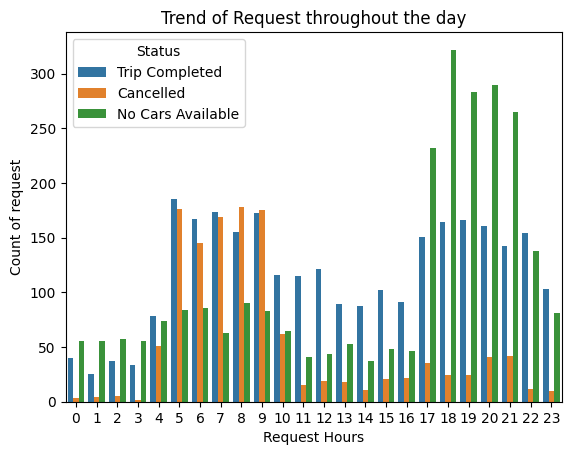

In [17]:
sns.countplot(x="Request Hours", hue="Status",data = uberdata)
plt.title('Trend of Request throughout the day')
plt.ylabel('Count of request')

Text(0, 0.5, 'Trip count')

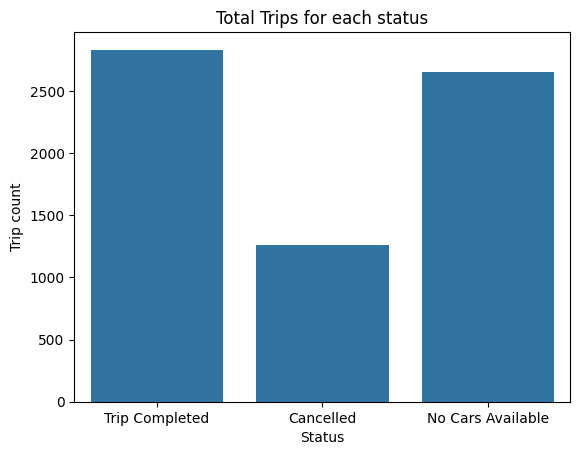

In [18]:
# Plotting Status column for determing frequency of trips with cancelled, no cars available and trip completed status.

sns.countplot(x="Status", data = uberdata)
plt.title('Total Trips for each status')
plt.ylabel('Trip count')

From above count plot we can conclude that, almost an equal number of request ends with status of either No Car Available or Trips Completed.

Determine the most problematic pickup points for all request status.

Text(0, 0.5, 'Airport/City trip count')

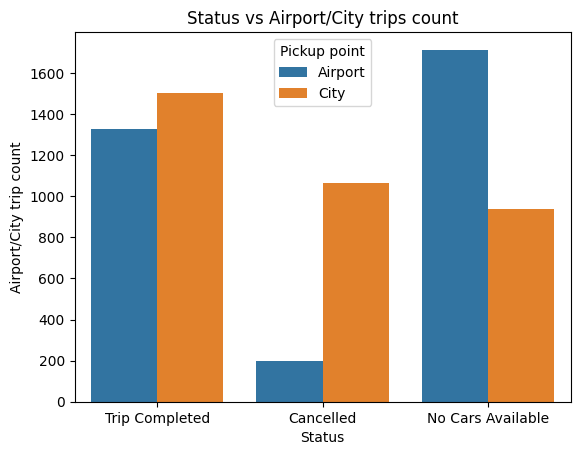

In [19]:
sns.countplot(x="Status", hue="Pickup point", data = uberdata)
plt.title('Status vs Airport/City trips count')
plt.ylabel('Airport/City trip count')

'NO cars availabel'- between 1600-1700no of trips where point is 'Airport' uber customers didn't get the car.



'Trip completed' - between 1400-1500no of trips were cokpleted where pickup point is city and around 1300 trips were completed for Airport pickup point.

'Cancelled' - between 1000-1050no of trips were cancelled as well ehere pick up point is city which is a little less than trips completed where pickup point is city.

Text(0.5, 0, 'Status count')

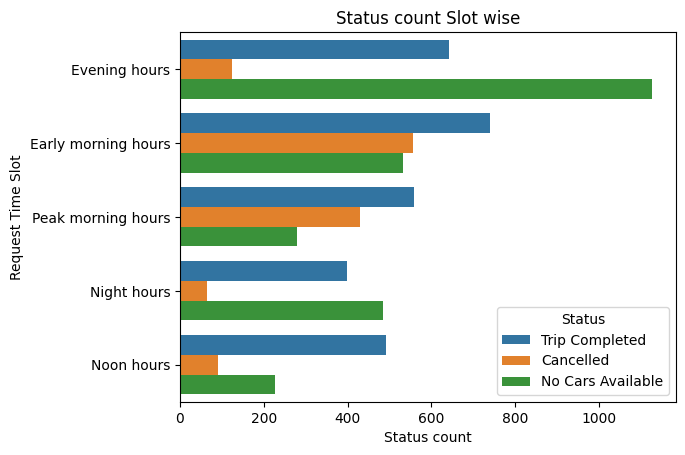

In [20]:
#Determine time slots when maximum trips were completed/cancelled/no cars available.

sns.countplot(y="Request Time Slot", hue="Status", data = uberdata, order = uberdata['Request Time Slot'].value_counts().index)
plt.title('Status count Slot wise')
plt.xlabel('Status count')

Key highlights from above plot:

EVENING HOURS(5pm-8pm): No of requests between 1000-1200 ended with no cars available.

EARLY MORNING HOURS(1am-7am): No of requests between 500-600 were cancelled and cars were not available.

EARLY MORNING HOURS(1am-7am): Approx 700-800 no of trips were completed.

In [21]:
#To analyze plots for each trip status, creating individual data frames.

df_nocars = uberdata[(uberdata['Status'] == 'No Cars Available')]
df_tripcompl = uberdata[(uberdata['Status'] == 'Trip Completed')]
df_cancelled = uberdata[(uberdata['Status'] == 'Cancelled')]

Text(0.5, 0, 'Airport/City count')

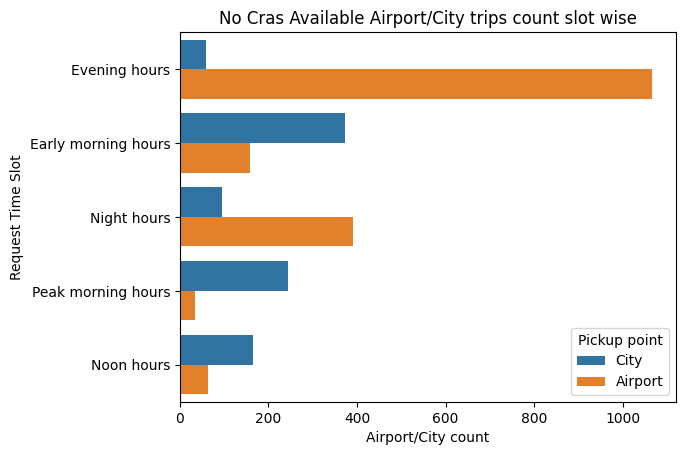

In [22]:
# No CARS AVAILABLE:  Airport and city pickup points counts for all time slots.

sns.countplot(y="Request Time Slot",hue="Pickup point",data = df_nocars, order = df_nocars['Request Time Slot'].value_counts().index)
plt.title('No Cras Available Airport/City trips count slot wise')
plt.xlabel('Airport/City count')

In [23]:
# For airport pickups during evening hours[5pm-8pm] maximum request ended up with no cars available (1100-1200).
#For city pickups during early morning hours[1am-7am] maximum request ended up with no cars available (350-400).

#Count of airport rides in evening hours where cars were not available.

df_nocars_airport = df_nocars.loc[(df_nocars['Pickup point']== 'Airport') & (df_nocars['Request Time Slot']== 'Evening hours')]
len(df_nocars_airport.index)

1067

In [24]:
#count of city rides in early morning hours where cars were not available.

df_nocars_city = df_nocars.loc[(df_nocars['Pickup point']== 'City') & (df_nocars['Request Time Slot']== 'Early morning hours')]
len(df_nocars_city.index)

374

Text(0.5, 0, 'Airport/City count')

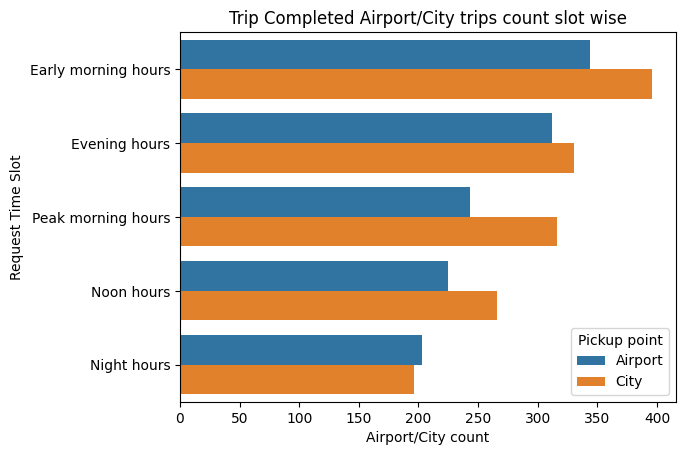

In [25]:
#Trip completed: Airport and City pickup points counts for all time slots.

sns.countplot(y="Request Time Slot",hue="Pickup point",data = df_tripcompl, order = df_tripcompl['Request Time Slot'].value_counts().index)
plt.title('Trip Completed Airport/City trips count slot wise')
plt.xlabel('Airport/City count')

For city pickups maximum trips were completed during early mornings hours 1am- 7am (approx 400).

For airport pickups maximum trips were completed durinh early morning hours only 1am- 7am (approx 340).

In [26]:
#Count of city rides in early morning hours where trips were completed.

df_tripcompl_city = df_tripcompl.loc[(df_tripcompl['Pickup point']== 'City') & (df_tripcompl['Request Time Slot']== 'Early morning hours')]
len(df_tripcompl_city.index)

396

In [27]:
#Count of airport rides in early morning hours where trips were completed.

df_tripcompl_airport = df_tripcompl.loc[(df_tripcompl['Pickup point']== 'Airport') & (df_tripcompl['Request Time Slot']== 'Early morning hours')]
len(df_tripcompl_airport.index)

344

Text(0.5, 0, 'Airport/City count')

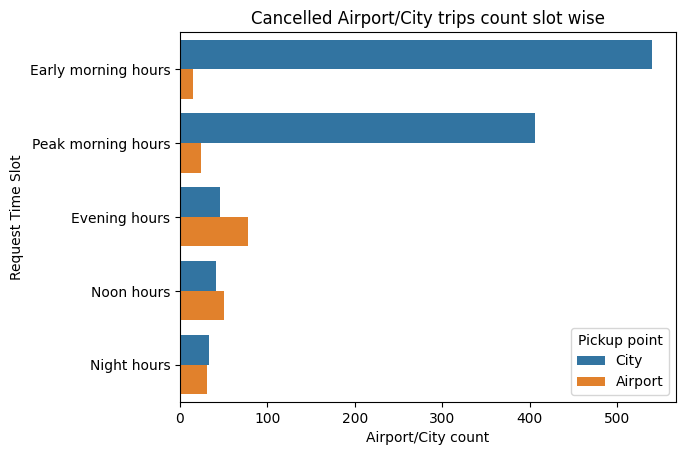

In [28]:
# cancelled : Airport and city pickup points counts for all time slots.

sns.countplot(y="Request Time Slot",hue="Pickup point",data= df_cancelled, order=df_cancelled['Request Time Slot'].value_counts().index)
plt.title('Cancelled Airport/City trips count slot wise')
plt.xlabel('Airport/City count')

For city pickups maximum trips were cancelled during early morning hours of 1am- 7am(approx 500-600).

For airport pickups maximum trips were completed during evening hours of 5pm- 8pm(approx 50-90).

In [29]:
#Count of city rides in early morning hours where trips were cancelled by drivers.

df_cancelled_city = df_cancelled.loc[(df_cancelled['Pickup point']== 'City') & (df_cancelled['Request Time Slot']=='Early morning hours')]
len(df_cancelled_city.index)

540

In [30]:
# Count of airport rides in evening hours where request were cancelled by drivers.

df_cancelled_airport = df_cancelled.loc[(df_cancelled['Pickup point']== 'Airport') & (df_cancelled['Request Time Slot']=='Evening hours')]
len(df_cancelled_airport.index)

78

# TOTAL REQUEST FOR EACH TRIP STATUS.

In [31]:
print("TOTAL REQUEST WHERE CARS WERE NOT AVAILABLE :"+str(len(df_nocars.index)))
print("TOTAL REQUEST WHERE TRIPS WERE COMPLETED :"+str(len(df_tripcompl.index)))
print("TOTAL REQUEST WHERE TRIPS WERE CANCELLED :"+str(len(df_cancelled.index)))

TOTAL REQUEST WHERE CARS WERE NOT AVAILABLE :2650
TOTAL REQUEST WHERE TRIPS WERE COMPLETED :2831
TOTAL REQUEST WHERE TRIPS WERE CANCELLED :1264


Calculating Demand-Supply metrics:
 1. Total Demand: Total trips made with all three status.
 2. Total Supply: Total number if trips completed.
 3. Gap: Difference between total demand and supply   

In [32]:
demand = len(df_nocars.index)+ len(df_cancelled.index) + len(df_tripcompl.index)
print("Total Demand:"+str(demand))

supply = len(df_tripcompl.index)
print("Total Supply :"+str(supply))

gap = demand - supply
print("Total Gap :"+str(gap))

Total Demand:6745
Total Supply :2831
Total Gap :3914


Text(0.5, 0, 'Demand Count')

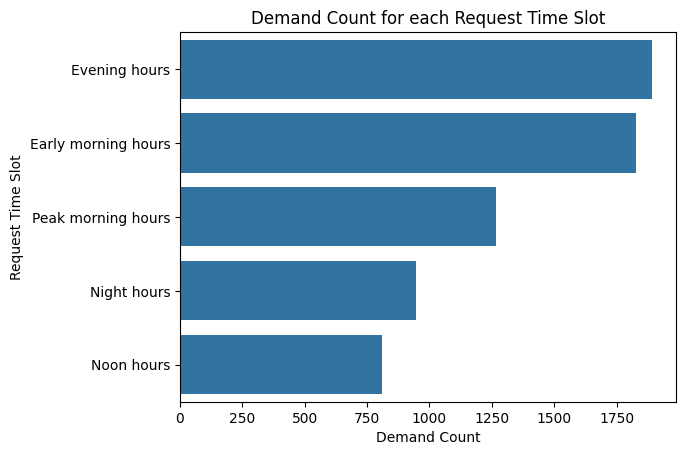

In [33]:
# Plotting number of requests for each request time slot to see the demand across time slots:

sns.countplot(y="Request Time Slot",data= uberdata,order= uberdata['Request Time Slot'].value_counts().index)
plt.title('Demand Count for each Request Time Slot')
plt.xlabel('Demand Count')

Demand for all time slots:
  1. 0-8 early morning hours- approx 1800-1900
  2. 8-12 Peak morning hours- approx 1250-1300
  3. 12-17 Noon hours- approx 750-850
  4. 17-21 Evening hours- approx 1800-2000
  5. 21-23 Night hours- approx 700-750

In [34]:
len(uberdata.loc[(uberdata['Request Time Slot'] == 'Evening hours')].index)

1893

We can infer that maximum demand is during evening hours between 5PM- 8PM.

# PLOTTING NUMBER OF REQUESTS FOR EACH TIME SLOT ONLY WHERE TRIP WAS COMPLETED.

Text(0.5, 0, 'Supply Count')

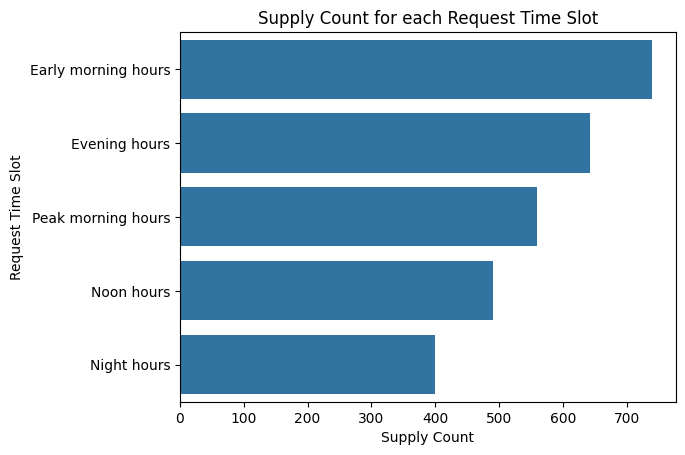

In [35]:
sns.countplot(y="Request Time Slot",data = df_tripcompl,order= df_tripcompl['Request Time Slot'].value_counts().index)
plt.title('Supply Count for each Request Time Slot')
plt.xlabel('Supply Count')

Supply for all request time slots:
  1. 0-8 early morning hours- approx 700-750
  2. 8-12 Peak morning hours- approx 500-550
  3. 12-17 Noon hours- approx 450-500
  4. 17-21 Evening Hours- approx 600-650
  5. 21-23 Night hours- approx 250-300  

In [36]:
len(df_tripcompl.loc[(df_tripcompl['Request Time Slot'] == 'Early morning hours')].index)

740

We can infer maximum supply is in early morning hours between 1am- 7am.

FROM THE ABOVE PLOTS WE CAN CONCLUDE THAT THEIR IS AN IMBALANCE BETWEEN DEMAND AND SUPPLY. HENCE, NOW CALCULATING DEMAND-SUPPLYU METRICX FOR BOTH AIRPORT AND CITY REQUESTS FOR ALL REQUESTS TIME SLOTS.

In [38]:
# Creating two seperate data frames for Airport and City ride:

df_airport_request = uberdata.loc[uberdata['Pickup point']=='Airport']
df_city_request = uberdata.loc[uberdata['Pickup point']=='City']

In [39]:
def calculateDemandSupply(dataframe, timeSlot):
  demand = dataframe[(dataframe['Request Time Slot'] == timeSlot)]['Request id'].count()
  supply = dataframe[(dataframe['Request Time Slot'] == timeSlot) & (dataframe['Status'] == 'Trip Completed')]['Request id'].count()
  gap = demand - supply

  return demand, supply, gap

In [40]:
# DEMAND-SUPPLY METRICS FOR AIRPORT RIDES FOR ALL TIME SLOTS.

demand_earlymorning_a, supply_earlymorning_a, gap_earlymorning_a = calculateDemandSupply(df_airport_request, 'Early morning hours')
demand_peakmorning_a, supply_peakmorning_a, gap_peakmorning_a = calculateDemandSupply(df_airport_request, 'Peak morning hours')
demand_noon_a, supply_noon_a, gap_noon_a = calculateDemandSupply(df_airport_request, 'Noon hours')
demand_evening_a, supply_evening_a, gap_evening_a = calculateDemandSupply(df_airport_request, 'Evening hours')
demand_night_a, supply_night_a, gap_night_a = calculateDemandSupply(df_airport_request, 'Night hours')

In [41]:
# DEMAND-SUPPLY METRICS FOR CITY RIDES FOR ALL TIME SLOTS:

demand_earlymorning_c, supply_earlymorning_c, gap_earlymorning_c = calculateDemandSupply(df_city_request, 'Early morning hours')
demand_peakmorning_c, supply_peakmorning_c, gap_peakmorning_c = calculateDemandSupply(df_city_request, 'Peak morning hours')
demand_noon_c, supply_noon_c, gap_noon_c = calculateDemandSupply(df_city_request, 'Noon hours')
demand_evening_c, supply_evening_c, gap_evening_c = calculateDemandSupply(df_city_request, 'Evening hours')
demand_night_c, supply_night_c, gap_night_c = calculateDemandSupply(df_city_request, 'Night hours')

In [42]:
# CALCULATING TOTAL DEMAND AND SUPPLY FOR ALL TIME SLOTS:

#Total demand
demand_earlymorning = demand_earlymorning_a + demand_earlymorning_c
demand_peakmorning = demand_peakmorning_a + demand_peakmorning_c
demand_noon = demand_noon_a + demand_noon_c
demand_evening = demand_evening_a + demand_evening_c
demand_night = demand_night_a + demand_night_c

#Total supply
supply_earlymorning = supply_earlymorning_a + supply_earlymorning_c
supply_peakmorning = supply_peakmorning_a + supply_peakmorning_c
supply_noon = supply_noon_a + supply_noon_c
supply_evening = supply_evening_a + supply_evening_c
supply_night = supply_night_a + supply_night_c

#Total gap
gap_earlymorning = demand_earlymorning - supply_earlymorning
gap_peakmorning = demand_peakmorning - supply_peakmorning
gap_noon = demand_noon - supply_noon
gap_evening = demand_evening - supply_evening
gap_night = demand_night - supply_night

Text(0, 0.5, 'Airport/City request count')

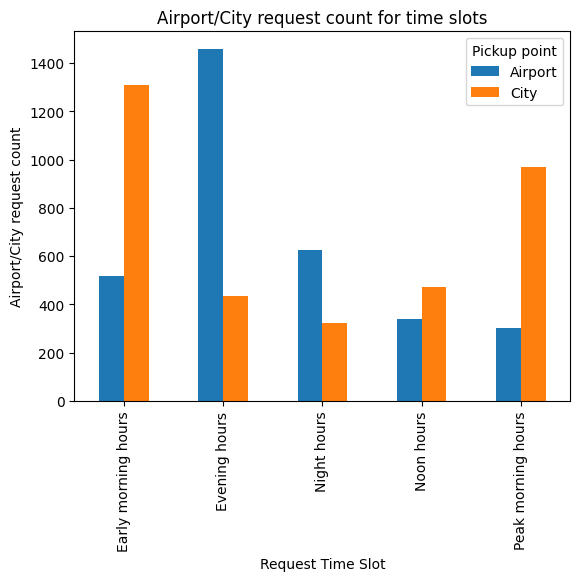

In [43]:
# Plotting count of trip for all request time slots corresponding to Airport and City pickup points.

uberdata.groupby(['Request Time Slot','Pickup point']).size().unstack().plot(kind='bar',stacked=False)
plt.title('Airport/City request count for time slots')
plt.ylabel('Airport/City request count')

Conclusions:

  1. Maximum trip requests from Airport were made in evening hours.
  2. Maximum trip requests from City were made in early morning hours.

 Creating a new gap data frame with demand-supply counts for all time slots.

In [46]:
gap_data = {'Request Time Slot': ['Early morning','Peak morning','Noon','Evening','Night'],
            'Total Demand': [demand_earlymorning,demand_peakmorning,demand_noon,demand_evening,demand_night],
            'Total Supply': [supply_earlymorning,supply_peakmorning,supply_noon,supply_evening,supply_night],
            'Total Gap': [gap_earlymorning,gap_peakmorning,gap_noon,gap_evening,gap_night],
            'Demand_From_Airport': [demand_earlymorning_a,demand_peakmorning_a,demand_noon_a,demand_evening_a,demand_night_a],
            'Supply_To_Airtport': [supply_earlymorning_a,supply_peakmorning_a,supply_noon_a,supply_evening_a,supply_night_a],
            'Gap_From_Airport': [gap_earlymorning_a,gap_peakmorning_a,gap_noon_a,gap_evening_a,gap_night_a],
            'Demand_From_City': [demand_earlymorning_c,demand_peakmorning_c,demand_noon_c,demand_evening_c,demand_night_c],
            'Supply_To_City': [supply_earlymorning_c,supply_peakmorning_c,supply_noon_c,supply_evening_c,supply_night_c],
            'Gap_From_City': [gap_earlymorning_c,gap_peakmorning_c,gap_noon_c,gap_evening_c,gap_night_c]}
gap_df = pd.DataFrame(data=gap_data)

 Viewing gap data frame

In [47]:
gap_df

,Request Time Slot,Total Demand,Total Supply,Total Gap,Demand_From_Airport,Supply_To_Airtport,Gap_From_Airport,Demand_From_City,Supply_To_City,Gap_From_City
0,Early morning,1827,740,1087,517,344,173,1310,396,914
1,Peak morning,1268,559,709,301,243,58,967,316,651
2,Noon,810,491,319,339,225,114,471,266,205
3,Evening,1893,642,1251,1457,312,1145,436,330,106
4,Night,947,399,548,624,203,421,323,196,127


In [48]:
gap_df[['Request Time Slot','Total Demand','Total Supply','Gap_From_City']].sort_values('Gap_From_City',ascending=False)

,Request Time Slot,Total Demand,Total Supply,Gap_From_City
0,Early morning,1827,740,914
1,Peak morning,1268,559,651
2,Noon,810,491,205
4,Night,947,399,127
3,Evening,1893,642,106


# PLOTTING DEMAND-SUPPLY GAP FOR ALL REQUEST TIME SLOTS

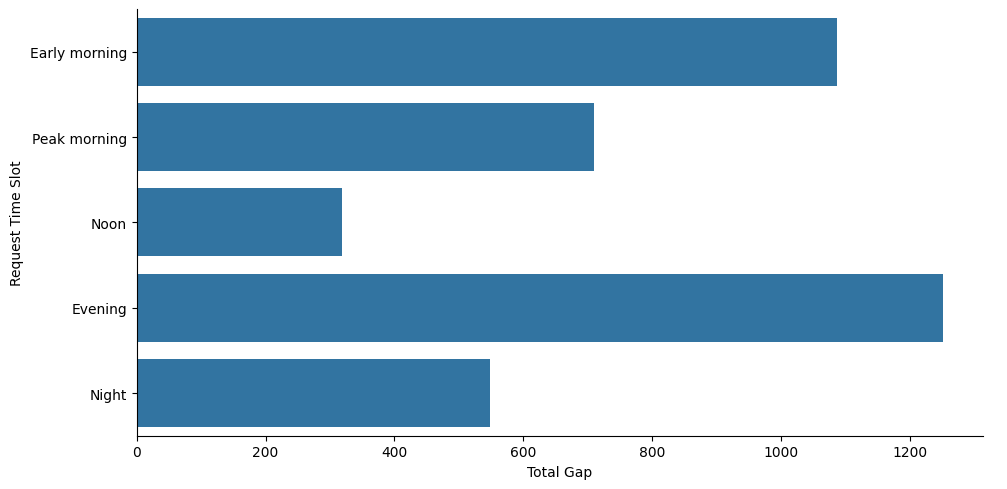

In [49]:
sns.catplot(x="Total Gap",y="Request Time Slot",kind="bar",data = gap_df,height = 5, aspect=2)

Conclusion:
  Demand-supply gap is maximum for Evening hours.

  Demand-supply gap is minimum for noon hours.

# VISUALIZING GAP DIFFERENCE BY PICKUP POINTS AND ALL TIME SLOTS:

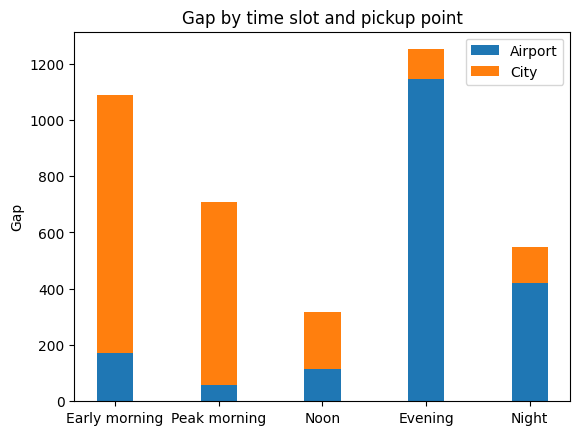

In [51]:
labels = gap_df['Request Time Slot']
gap_airport = gap_df['Gap_From_Airport']
gap_city = gap_df['Gap_From_City']
width = 0.35    #the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, gap_airport, width, label='Airport')
ax.bar(labels, gap_city, width, bottom=gap_airport,label='City')

ax.set_ylabel('Gap')
ax.set_title('Gap by time slot and pickup point')
ax.legend()

plt.show()

We can clearly see that gap is maximum for Airport rides in the Evening hours and for City rides in early morning hours.

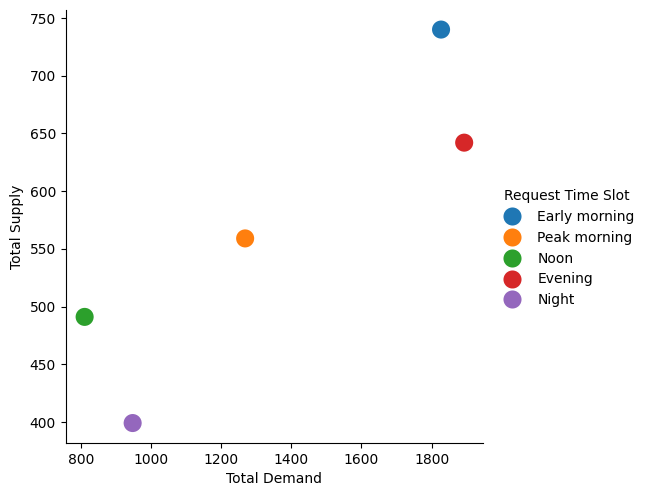

In [52]:
#PLOTTING DEMAND AND SUPPLY FOR ALL TIME SLOTS AS CALCULATED IN gap_df DATAFRAME.

demandVsGap = sns.pairplot(gap_df,x_vars='Total Demand', y_vars='Total Supply', hue='Request Time Slot', plot_kws= {'alpha': 1, 's': 200},height= 5)

In [53]:
# Metric figure calculated in gap_df can be visualized in above plot

gap_df[['Request Time Slot','Total Demand','Total Supply','Gap_From_City']].sort_values('Gap_From_City',ascending=False)

,Request Time Slot,Total Demand,Total Supply,Gap_From_City
0,Early morning,1827,740,914
1,Peak morning,1268,559,651
2,Noon,810,491,205
4,Night,947,399,127
3,Evening,1893,642,106


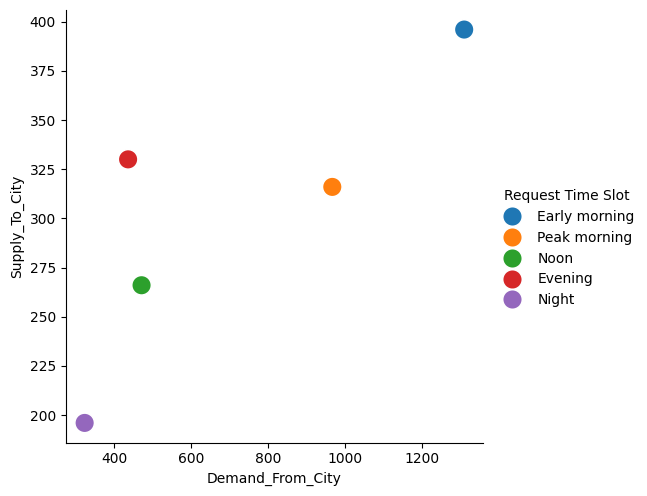

In [54]:
# PLOTTING DEMAND-SUPPLY FOR CITY TO AIRPORT RIDES.

cityVsGap = sns.pairplot(gap_df, x_vars='Demand_From_City', y_vars='Supply_To_City', hue='Request Time Slot', plot_kws= {'alpha': 1, 's': 200},height= 5)

Numbers caluated in gap_df for City demand-supply can be visualized in above plot

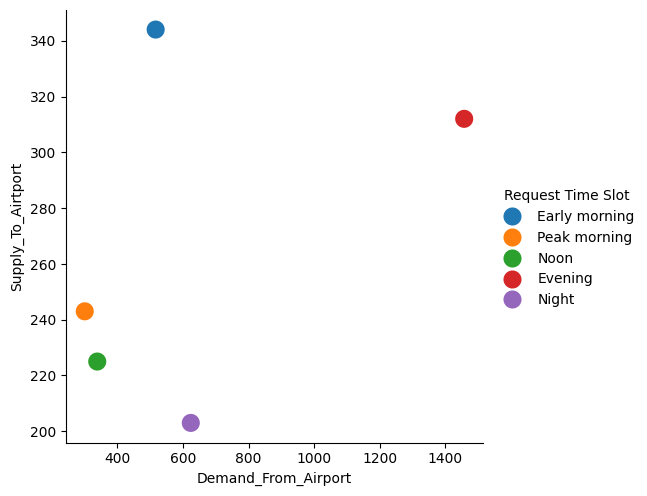

In [55]:
#PLOTTING DEMAND-SUPPLY FOR AIRPORT TO CITY RIDES:

airportVsGap = sns.pairplot(gap_df, x_vars='Demand_From_Airport', y_vars='Supply_To_Airtport', hue='Request Time Slot', plot_kws= {'alpha': 1, 's': 200},height= 5)

Numbers calculated in gap_df for Airport demand-supply can be visualized in above plot.

In [56]:
#PERCENTAGE WISE DISTRIBUTION OF RIDES FOR CITY AND AIRPORT PICKUP POINTS (EARLY MORNING HOURS AND EVENING HOURS).

def pie_chart(dataframe):

  labels = dataframe.index.values
  sizes = dataframe['count'].values
  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.show()

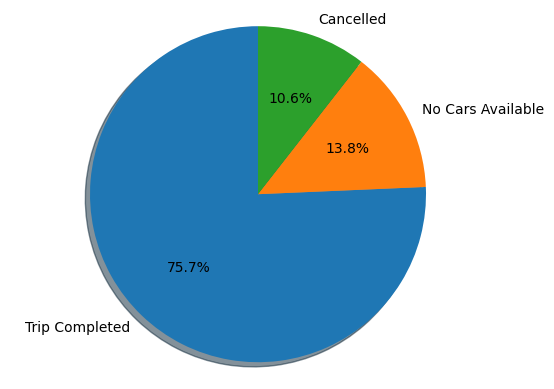

In [57]:
#Distribution of trips for pickupp point as City during evening hours.

df_city = df_city_request.loc[df_city_request['Request Time Slot']== 'Evening hours']
df_city_count = pd.DataFrame(df_city.Status.value_counts())
pie_chart(df_city_count)

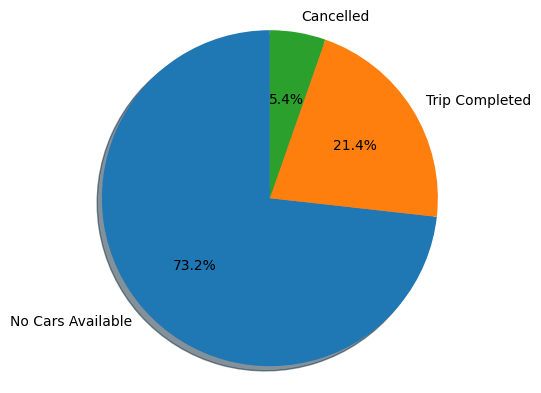

In [58]:
# Distribution of trips for pickupp point as Airport during evening hours.

df_airport = df_airport_request.loc[df_airport_request['Request Time Slot']== 'Evening hours']
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
pie_chart(df_airport_count)

 Evening hours[pickupp poinyt= Airport]:
        
  73% of tottal airport rides ended with 'NO CAR AVAILABLE'.
  Only 21% of airport trips trips were completed successfully.

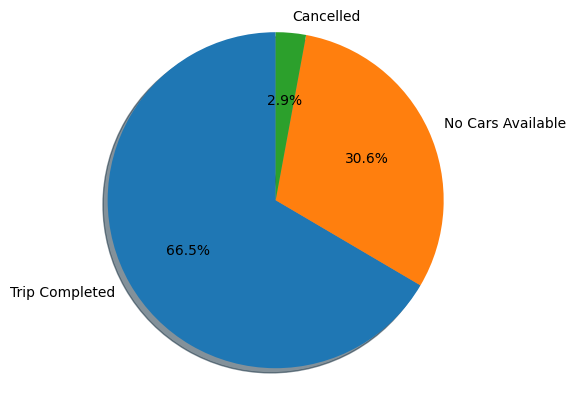

In [59]:
# Distribution of trips for pickup point as Airport during early morning hours.

df_airport = df_airport_request.loc[df_airport_request['Request Time Slot']== 'Early morning hours']
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
pie_chart(df_airport_count)

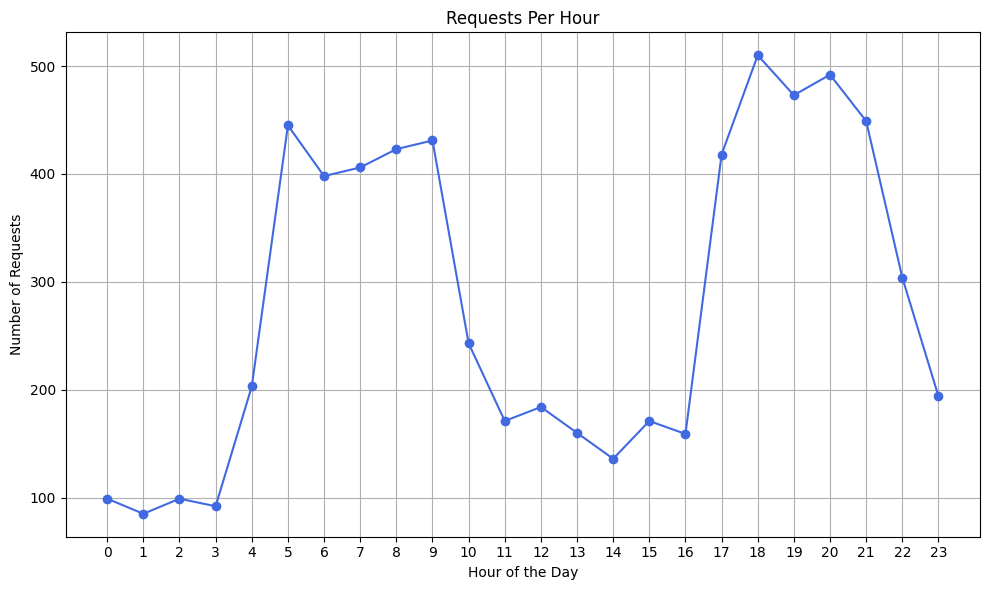

In [61]:
# A clean line chart showing demand variation across each hour of the day.

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Uber Request Data.csv")

# Convert to datetime
df['request_timestamp'] = pd.to_datetime(df['Request timestamp'], format='mixed', dayfirst=True)

# Extract hour
df['hour'] = df['request_timestamp'].dt.hour

# Group by hour and count requests
hourly_requests = df.groupby('hour').size()

# Plotting
plt.figure(figsize=(10,6))
hourly_requests.plot(kind='line', marker='o', color='royalblue')
plt.title('Requests Per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

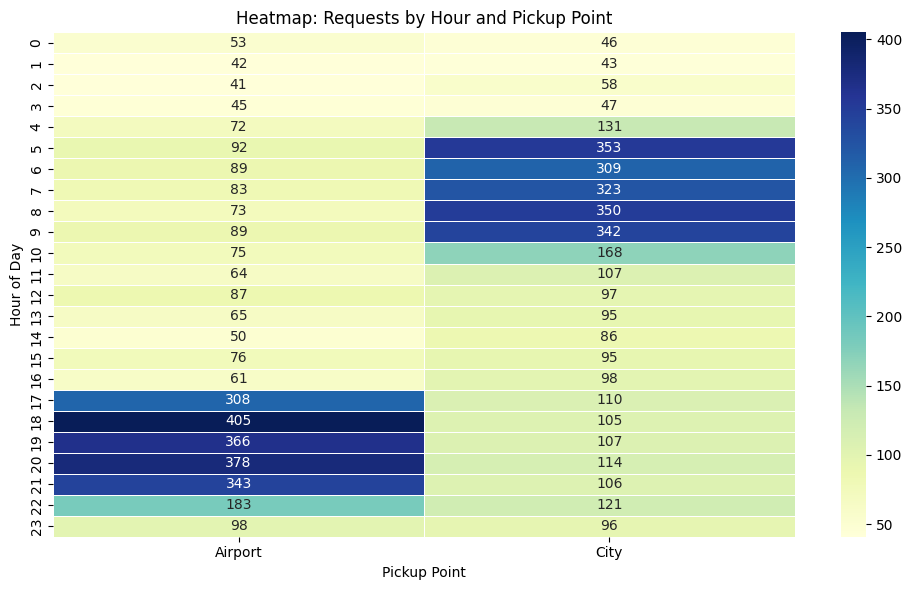

In [62]:
# the Heatmap: Requests by Hour and Pickup Point, which helps visualize demand patterns across different hours and pickup points

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare the data
df = pd.read_csv("Uber Request Data.csv")
df['request_timestamp'] = pd.to_datetime(df['Request timestamp'], format='mixed', dayfirst=True)
df['hour'] = df['request_timestamp'].dt.hour

# Create a pivot table: rows = hour, columns = pickup point, values = request count
pivot = df.pivot_table(index='hour', columns='Pickup point', values='Request id', aggfunc='count')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap: Requests by Hour and Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()

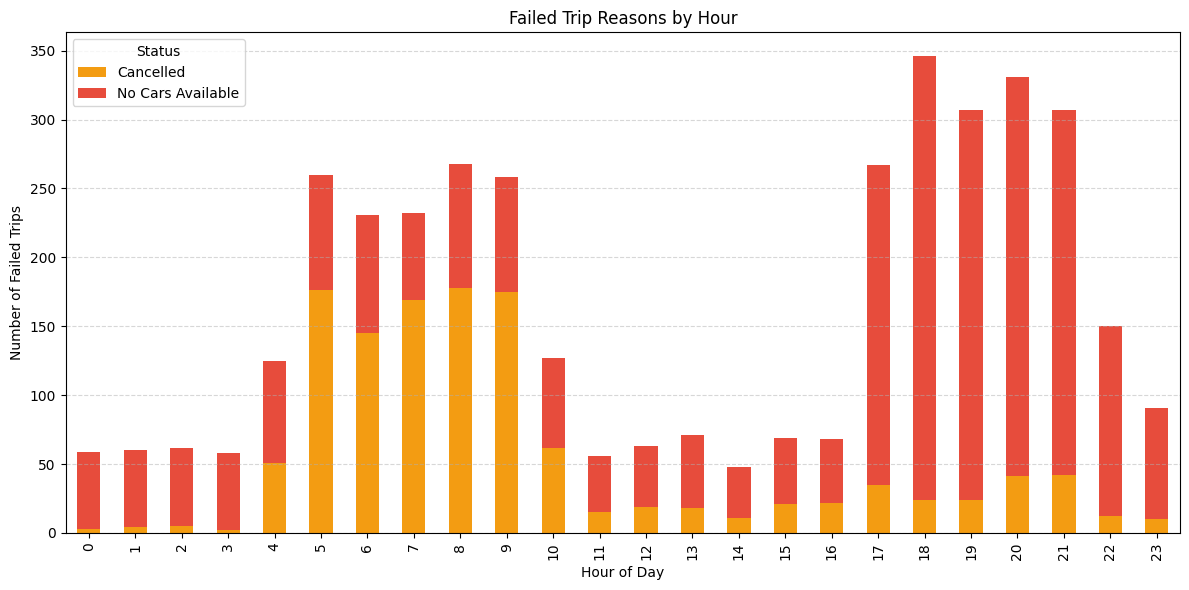

In [63]:
# The Stacked Column Chart – Cancellations and No Cars Available by Hour is a powerful visual to compare the two main causes of failed trips

import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv("Uber Request Data.csv")
df['request_timestamp'] = pd.to_datetime(df['Request timestamp'], format='mixed', dayfirst=True)
df['hour'] = df['request_timestamp'].dt.hour

# Filter only failed trip statuses
failed_df = df[df['Status'].isin(['Cancelled', 'No Cars Available'])]

# Group by hour and status
failed_by_hour = failed_df.groupby(['hour', 'Status']).size().unstack().fillna(0)

# Plot stacked bar chart
failed_by_hour.plot(kind='bar', stacked=True, figsize=(12,6), color=['#f39c12', '#e74c3c'])
plt.title('Failed Trip Reasons by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Failed Trips')
plt.legend(title='Status')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# CONCLUSION:

The analysis highlighted that peak hours—especially during early mornings and late evenings—show a significant mismatch between customer demand and driver supply. Airport pickup points frequently experience a shortage of drivers, leading to high occurrences of the "No Cars Available" status. In contrast, cancellations are more prevalent in city pickups, often during high-demand hours.

By visualizing these gaps using heatmaps, line charts, and stacked bar charts, the project demonstrates how data can reveal operational challenges in real-world ride-hailing platforms. The insights gained can guide Uber (or similar services) to implement dynamic driver allocation, incentive mechanisms, and targeted policies for minimizing unfulfilled requests and improving user satisfaction.

In summary, this project showcases the power of combining data analysis with visualization tools to solve real business problems and support data-driven decision-making.

# Recommendations

    1. Redistribute Drivers Dynamically: Incentivize drivers to position themselves at high-demand locations (like the Airport) during early hours.

    2. Time-Based Surge Pricing: Apply smarter dynamic pricing during extreme demand hours to attract more drivers.

    3. Driver Analytics: Monitor and address patterns of driver cancellations, especially in the City area.

    4. Improve Predictive Allocation: Use historical data to deploy driver fleets more effectively based on expected hourly demand.